# PHÂN TÍCH DỮ LIỆU

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np


### Sử dụng dữ liệu sau khi đã tiền xử lí

In [14]:
df = pd.read_csv("./processed.csv")
df.head()

,AQI index,Station name,Dominent pollutant,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Data Time S,Status,Latitude,Longitude
0,102.0,Hồ Chí Minh,PM2.5,5.0,25.0,83.0,10.0,6.5,1009.0,42.0,102.0,5.0,27.0,3.6,2021-01-21 19:00:00,Unhealthy for sensitive groups,10.782978,106.700711
1,221.0,Hà Nội,aqi,6.0,22.0,77.0,18.0,2.0,1015.0,49.0,65.0,2.0,18.0,1.5,2021-01-21 20:00:00,Very unhealthy,21.081121,105.818031
2,281.0,Hà Nội,PM2.5,0.3,22.0,77.0,8.7,0.9,1015.0,49.0,281.0,2.1,18.0,1.5,2021-01-21 20:00:00,Very unhealthy,21.021506,105.818875
3,36.0,Gia Lai,PM2.5,3.0,20.4,60.2,6.0,9.0,923.7,29.0,36.0,1.0,24.3,1.0,2021-01-21 20:00:00,Good,13.998599,107.996482
4,68.0,Thừa Thiên Huế,PM2.5,2.0,23.0,88.0,10.0,6.5,1015.0,52.0,68.0,5.0,21.0,1.0,2021-01-21 19:00:00,Moderate,16.462260,107.596351


### Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

In [15]:
num_rows, num_cols = df.shape
num_rows, num_cols

(2125, 18)

### Mỗi dòng có ý nghĩa gì ?

Thể hiện tình trạng không khí tại từng thời điểm ở một vị trí xác định.

### Mỗi cột có ý nghĩa gì ?

Bao gồm 18 cột:
- AQI index: Chỉ số chất lượng không khí (Air Quality Index).
- Location: Vị trí địa lý của trạm quan trắc không khí.
- Station name: Tên trạm quan trắc không khí.
- Dominent pollutant: Chất gây ô nhiễm nổi bật.
- CO: Nồng độ khí CO (carbon monoxide).
- Dew: Điểm sương.
- Humidity: Độ ẩm.
- NO2: Nồng độ khí NO2 (nitrogen dioxide).
- O3: Nồng độ khí O3 (ozone).
- Pressure: Áp suất khí quyển.
- PM10: Nồng độ bụi mịn PM10 (particulate matter 10 micrometers or less).
- PM2.5: Nồng độ bụi mịn PM2.5 (particulate matter 2.5 micrometers or less).
- SO2: Nồng độ khí SO2 (sulfur dioxide).
- Temperature: Nhiệt độ.
- Wind: Tốc độ gió.
- Data Time S: Thời gian dữ liệu được ghi lại (theo múi giờ cục bộ).
- Status: Trạng thái dữ liệu.


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có dữ liệu nào bị thiếu không?

In [16]:
df.dtypes

AQI index             float64
Station name           object
Dominent pollutant     object
CO                    float64
Dew                   float64
Humidity              float64
NO2                   float64
O3                    float64
Pressure              float64
PM10                  float64
PM2.5                 float64
SO2                   float64
Temperature           float64
Wind                  float64
Data Time S            object
Status                 object
Latitude              float64
Longitude             float64
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào? 

In [17]:
numerical_des = df.describe()
missing_ratio = pd.DataFrame({col : df[col].isnull().sum() / len(df) for col in numerical_des.columns}, index=["missing_ratio"])
pd.concat([numerical_des,missing_ratio])

,AQI index,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Latitude,Longitude
count,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000
mean,91.173176,7.668282,22.250000,75.811953,11.632329,7.569176,1002.641882,45.463576,62.577176,9.659859,26.034965,2.904800,19.319340,106.437027
std,75.541355,10.284853,4.109572,17.528195,9.529171,9.066411,20.565126,31.351314,44.851473,31.999742,4.842132,4.281114,3.433979,1.122983
min,1.000000,0.100000,5.500000,13.000000,1.000000,0.900000,916.900000,0.500000,0.500000,0.100000,0.500000,0.200000,10.782978,104.121423
25%,41.000000,2.000000,20.900000,60.000000,5.000000,2.000000,1001.000000,24.000000,31.000000,2.000000,22.600000,1.500000,16.462260,105.812320
50%,81.000000,5.000000,23.000000,78.800000,10.000000,4.000000,1008.000000,42.000000,54.000000,3.600000,26.000000,2.500000,21.019940,106.034210
75%,122.000000,7.000000,25.000000,91.000000,18.000000,9.000000,1013.000000,55.000000,85.000000,5.100000,29.500000,3.600000,21.051210,107.115800
max,616.000000,98.000000,29.000000,100.000000,80.000000,93.000000,1024.500000,340.000000,315.000000,500.000000,39.000000,150.000000,22.678200,109.192524
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Pollutants distribution


In [18]:
# Tạo một đối tượng Figure
attributes = ["O3", "CO", "SO2", "NO2", "PM10", "PM2.5"]

fig = make_subplots(rows=1, cols=len(attributes),
                    column_widths=[1/len(attributes)]*len(attributes),
                    vertical_spacing=0,
                    horizontal_spacing=0.1,
                    )

for index, col in enumerate(attributes):
    fig.add_trace(go.Box(y=df[col], name=col), row=1, col=index + 1)

# Đặt tiêu đề cho biểu đồ
fig.update_layout(title='Boxplot of Pollutants')

# Hiển thị biểu đồ
fig.show()


## AQI Index

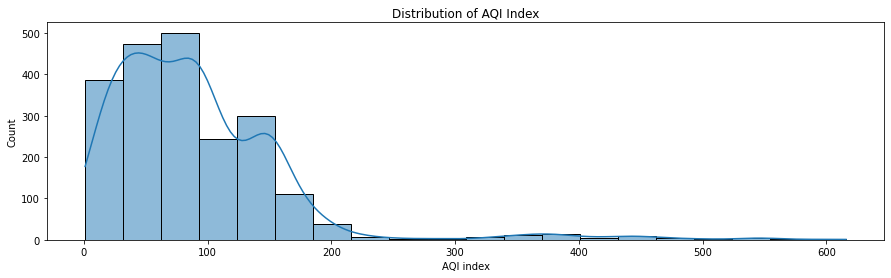

In [19]:
plt.figure(figsize=(15, 4))

sns.histplot(data=df, x='AQI index', kde=True, bins=20)

# Đặt tiêu đề cho biểu đồ
plt.title('Distribution of AQI Index')

# Hiển thị biểu đồ
plt.show()

### Với mỗi cột kiểu dữ liệu dạng categorical các giá trị được phân bố như thế nào? 

In [20]:
cate_labels=["Station name","Dominent pollutant","Status"]
cate_rows=["missing_ratio","num_diff_vals","diff_vals"]
data_cate={}
for col in cate_labels:
    row=[]
    row.append(round(df[col].isnull().sum()/len(df[col])*100,3))
    data_cate.update({f'{col}':row})

    row.append(len(df[col][df[col].isna()==False].unique()))
    row.append(np.array(df[col][df[col].isna()==False].unique()))
    data_cate.update({f'{col}':row})

cate_col_df=pd.DataFrame(data_cate,index=cate_rows)
display(cate_col_df)

,Station name,Dominent pollutant,Status
missing_ratio,0.0,0.0,0.0
num_diff_vals,11,5,6
diff_vals,"[Hồ Chí Minh, Hà Nội, Gia Lai, Thừa Thiên Huế,...","[PM2.5, aqi, PM10, CO, O3]","[Unhealthy for sensitive groups, Very unhealth..."


## Các tỉnh thành quan sát

In [21]:
fig = px.histogram(df, x='Station name', title="Regions")
fig.show()

**Ghi chú:** Hiển thị số lượng số liệu ghi nhận ở các khi vực tại Việt Nam

## BIỂU ĐỒ TRÒN VỀ TRẠNG THÁI CỦA MÔI TRƯỜNG

In [22]:
# Tính toán tần suất cho mỗi giá trị trong cột "Dominant pollutant"
pollutant_counts = df['Status'].value_counts()
pollutant_counts.name = "count"

# Vẽ biểu đồ tròn bằng plotly
fig = px.pie(pollutant_counts, values='count', names=pollutant_counts.index,
             title="Proportion of Status")
fig.show()

Danh sách các mức độ ô nhiễm đưa ra đã được sắp xếp theo thứ tự tăng dần về độ an toàn:

- Hazardous: Mức độ nguy hiểm cao nhất, chỉ số chất lượng không khí đạt mức rất cao và có thể gây nguy hiểm cho sức khỏe con người.
- Very Unhealthy: Mức độ rất không tốt, chỉ số chất lượng không khí đạt mức rất cao và có thể gây nguy hiểm cho sức khỏe con người.
- Unhealthy: Mức độ không tốt, chỉ số chất lượng không khí đạt mức cao và có thể gây hại cho sức khỏe con người.
- Unhealthy for Sensitive Groups: Mức độ không tốt cho nhóm nhạy cảm, chỉ số chất lượng không khí đạt mức cao và có thể gây hại cho những người nhạy cảm đối với ô nhiễm không khí.
- Moderate: Mức độ trung bình, chỉ số chất lượng không khí ở mức trung bình, không gây nguy hiểm cho sức khỏe con người.
- Good: Mức độ tốt nhất, chỉ số chất lượng không khí ở mức tốt, không có nguy cơ đáng kể đối với sức khỏe con người.

***Nhận xét:***
- Theo thống kê đã nêu, tỉ lệ mà không khí đạt ở mức sạch nằm trong khoảng 40.8%, mức tạm ổn (Moderate) thì đặt khoảng 34.2%. Với 2 chỉ số trên hiển thị trạng thái không khí không ảnh hưởng đến sức khỏe người dân ở mức 75%.
- Vậy là với 25% trạng thái ghi nhận là có thể gân ảnh hướng để sức khỏe cả con người => **là một chỉ số đáng báo động.**
  - Cụ thể là: 
    - Đã ghi nhận được 2 lần trạng thái không khí được ghi nhận ở mức báo động cao nhất - Hazadous, gây nguy hiểm trực tiếp đến sức khỏe.
    - 16.2% cho thấy không khí có thể tác động đến nhóm người bị nhạy cảm với ô nhiễm không khí, 7.53% là không tốt với sức khỏe.
    - Trạng thái Very Unhealthy cũng xuất hiện với 1.04% (17 lần) cho thấy chất lượng không khí đang báo động trầm trọng.

## Chất ô nhiễm chủ đạo


In [23]:
# Tính toán tần suất cho mỗi giá trị trong cột "Dominant pollutant"
pollutant_counts = df['Dominent pollutant'].value_counts()
pollutant_counts.name = "count"

# Vẽ biểu đồ tròn bằng plotly
fig = px.pie(pollutant_counts, values='count', names=pollutant_counts.index,
             title="Proportion of Dominant Pollutants")
fig.show()

***Nhận xét:***
- Biểu đồ trên hiển thị các chất gây ô nhiễm chủ yếu đến môi trường. Đa phần đó là do bụi mịn, có kích thước nhỏ hơn 2.5 micromet (pm25).
- Theo sau là 2 chỉ số là pm10 - bụi mình có kích thước nhỏ hơn 10 micromet (14.9%) và aqi (4.59%).